# Random forest Classifier

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [15]:
df = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Machine Learning\Heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


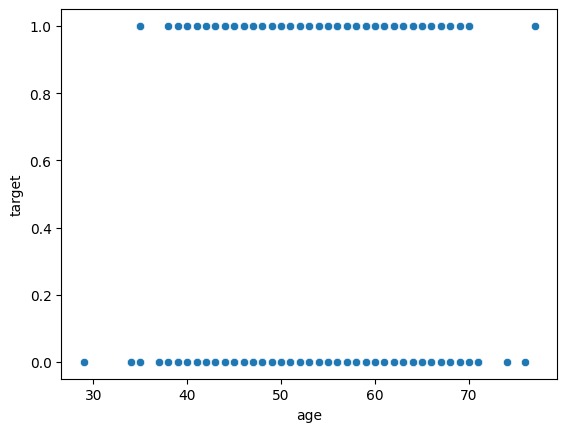

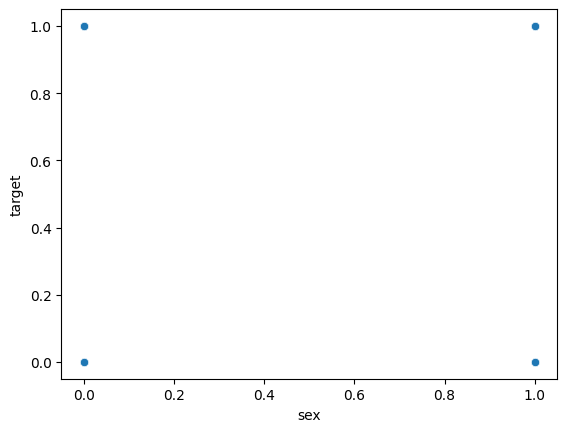

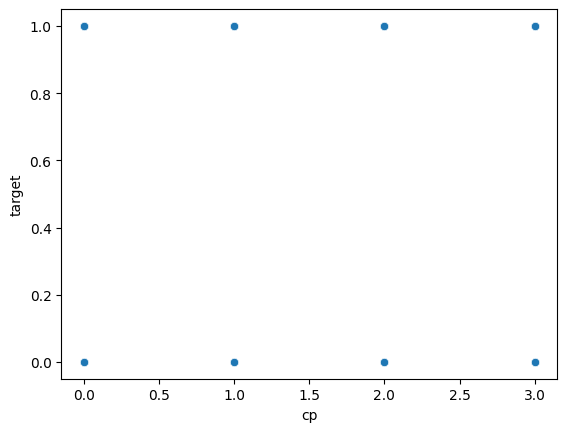

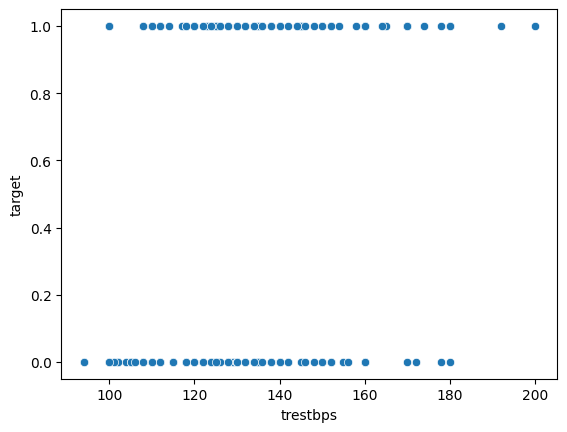

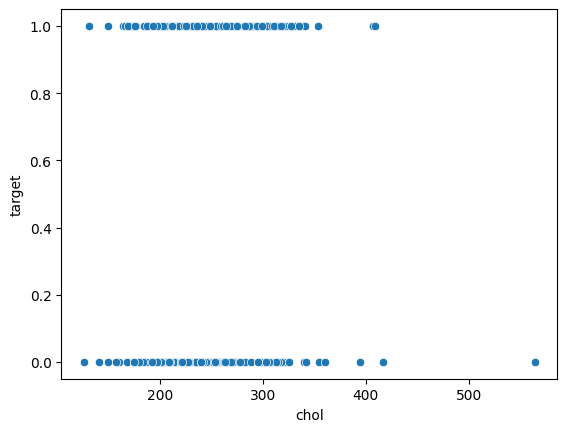

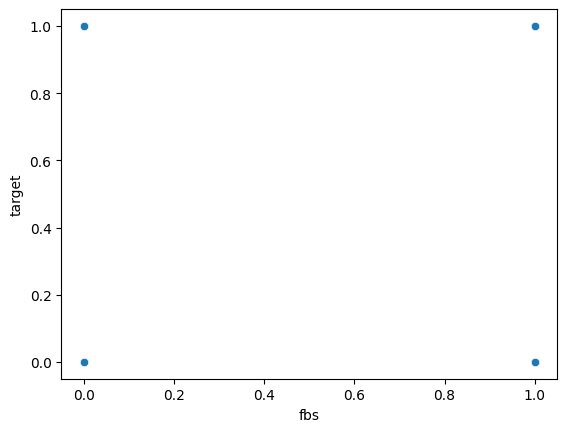

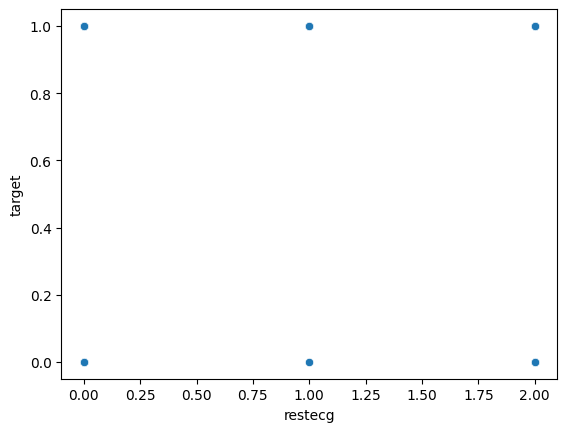

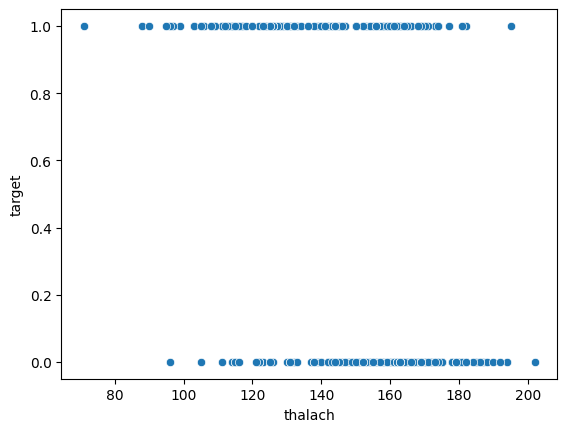

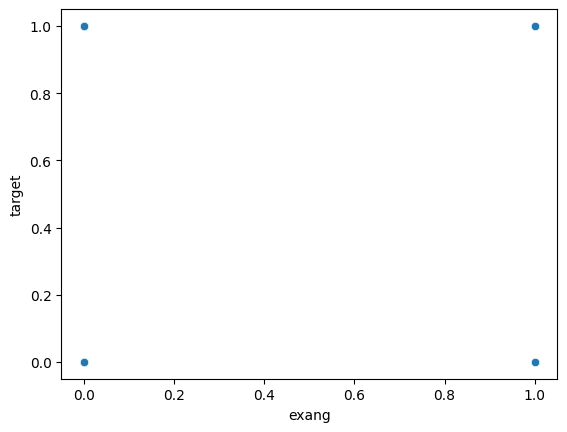

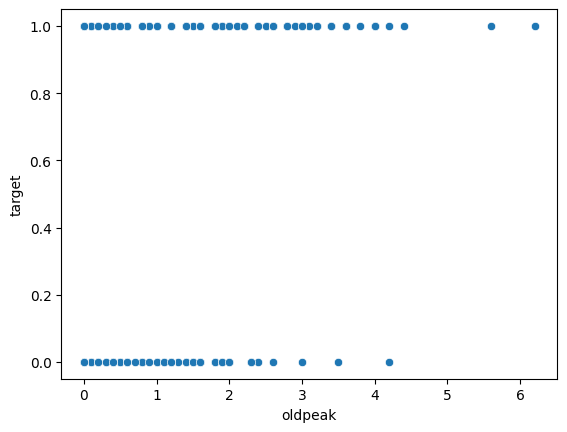

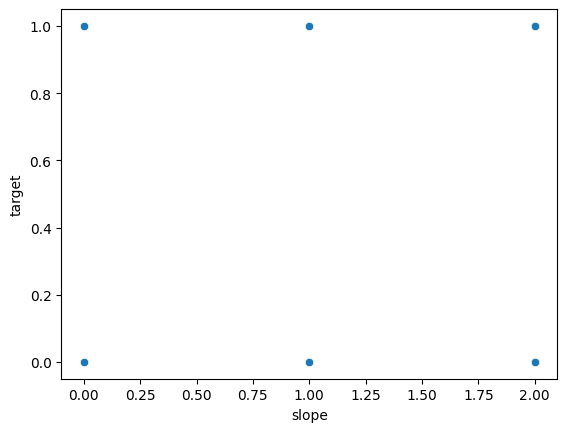

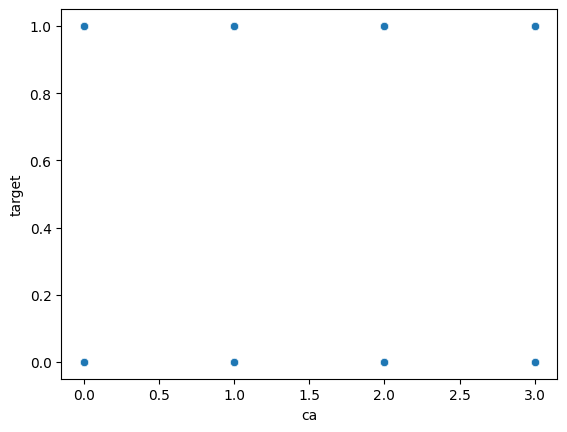

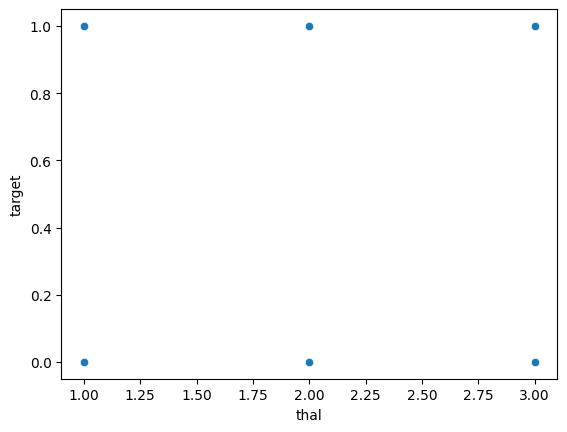

" so this isn't linear, but it's continuous "

In [16]:
features = df.iloc[:, :-1].columns

for col in features:
    sns.scatterplot(data=df, x=df[col], y=df['target'])
    plt.show()
''' so this isn't linear, but it's continuous '''

In [19]:
df.isna().sum() # no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
x = df[features]
y = df['target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

model = RandomForestClassifier(n_estimators=3, criterion='gini', max_depth=8, min_samples_split=10, random_state=5)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=3,
                       random_state=5)

In [53]:
model.feature_importances_

array([0.16129541, 0.05527342, 0.05580212, 0.08021901, 0.02350808,
       0.00986429, 0.01556835, 0.0830969 , 0.08844841, 0.11089632,
       0.07791597, 0.09938359, 0.13872812])

In [54]:
y_pred = model.predict(x_test)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
accuracy_score_1 = accuracy_score(y_test, y_pred)
classification_report_1 = classification_report(y_test, y_pred)
cross_validation_1 = cross_val_score(model, x_train, y_train, cv=10)

print('y_pred: \n',y_pred)
print(f'''\n Metrics
confusion_matrix_1: \n {confusion_matrix_1} \n
accuracy_score_1: \n {accuracy_score_1} \n
classification_report_1: \n {classification_report_1} \n
cross_validation_1: \n {cross_validation_1} \n
''')

y_pred: 
 [1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1]

 Metrics
confusion_matrix_1: 
 [[22 10]
 [ 8 21]] 

accuracy_score_1: 
 0.7049180327868853 

classification_report_1: 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.68      0.72      0.70        29

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61
 

cross_validation_1: 
 [0.84       0.72       0.83333333 0.70833333 0.625      0.79166667
 0.83333333 0.875      0.70833333 0.70833333] 


